In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib notebook

In [123]:
tStep=6000
height=np.zeros(int(tStep/2))

center=3.0#3
bandWidth=0.05

fName="Source_waveSurf/waveSurf_1225_2252_data.dat"
readFile=open(fName,"r")
spaceCount=0
indexCount=0
stepCount=0
ymax=0

for line in readFile:
    if line=='\n':
        spaceCount+=1 
        #print("%d %d"%(spaceCount, indexCount))
        if(indexCount%2!=0 and spaceCount==1):
            height[stepCount]=ymax
            stepCount+=1
            ymax=0
    if (line!='\n' and (indexCount%2)!=0):
        splitted=line.split()
        px=splitted[1]
        py=splitted[2]
        px=float(px)
        py=float(py)
        if(center-bandWidth < px and px < center+bandWidth):
            if(py>ymax):
                ymax=py
    if spaceCount==2:
        indexCount+=1
        spaceCount=0
    if indexCount>tStep:
        break
    if not line:
        print(stepCount)
        break



readFile.close()
print("end")

end


In [124]:
print(stepCount)

3000


In [125]:
time=np.arange(0, stepCount*0.01, 0.01)
print(time.size)
print(height.size)

3000
3000


<IPython.core.display.Javascript object>


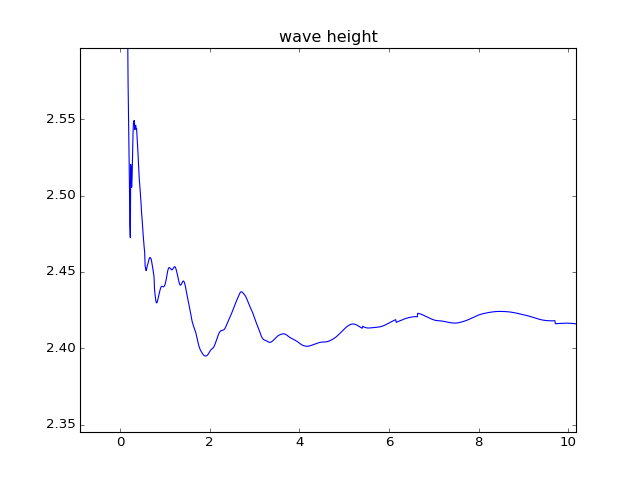

In [126]:

plt.title("wave height")
plt.plot(time, height)

In [132]:
pi=np.pi
g=9.8
k=2.0*pi/6.0
h=3.0
omega=2.0*pi/1.5
print("k:%f"%k)
print("omega:%f"%omega)
gamma=(omega*omega-g*k*np.tanh(k*h))/(k*k*k*np.tanh(k*h)/1000.0)
print("gamma:%f"%gamma)
lam_m=2.0*pi*np.sqrt(gamma/(1000.0*g))
print("lambda_m:%f"%lam_m)

k:1.047198
omega:4.188790
gamma:6399.517751
lambda_m:5.077389
